<a href="https://colab.research.google.com/github/OfficialMuditsinha/Bank-Marketing-Effectiveness-Prediction-/blob/main/Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

## <b> Mounting Google Colab

In [58]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## <b> Importing Libraries

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.mosaicplot import mosaic


from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from itertools import product
import warnings
warnings.simplefilter("ignore")
import seaborn as sns

## <b> Importing the dataset

In [60]:
df1=pd.read_csv("/content/drive/MyDrive/dat/bank-full.csv")

## <b> Checking first five entries in data set

In [61]:
df1.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


As we can see that data is quiet messy but if we observe we see that each entry is seprated by ";". So what we can do is to use excel and split the entries via";" delimeter

## <b> Importing dataset in clear format 

In [62]:
df=pd.read_csv("/content/drive/MyDrive/dat/bank-fullclean.csv")

## <b> Checking first five entries 

In [63]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## <b> Checking last 5 entries of the dataset

In [64]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


## <b> Checking for null values 

In [65]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## <b> Univariate Data Analysis

In [66]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## age

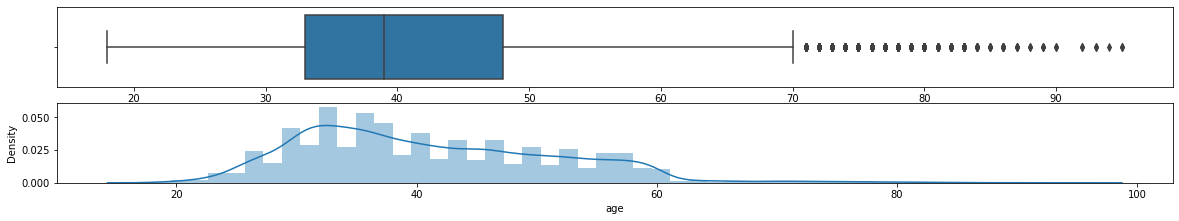

In [67]:
fig = plt.figure(figsize=(20,5))

ax2 = fig.add_subplot(3,1,2) 
sns.boxplot(data = df, x='age', ax = ax2)

ax3 = fig.add_subplot(3,1,3) 
ax3 = sns.distplot(df['age'])

We see there are few outliers so let's remove them.

In [68]:
df=df[df['age']<70]

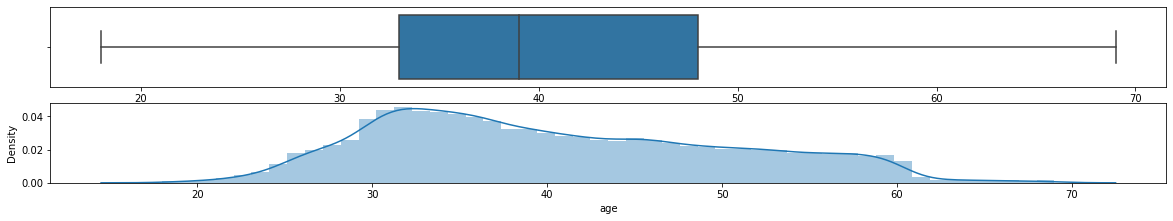

In [69]:
#After outlier treatment
fig = plt.figure(figsize=(20,5))

ax2 = fig.add_subplot(3,1,2) 
sns.boxplot(data = df, x='age', ax = ax2)

ax3 = fig.add_subplot(3,1,3) 
ax3 = sns.distplot(df['age'])

## Balance

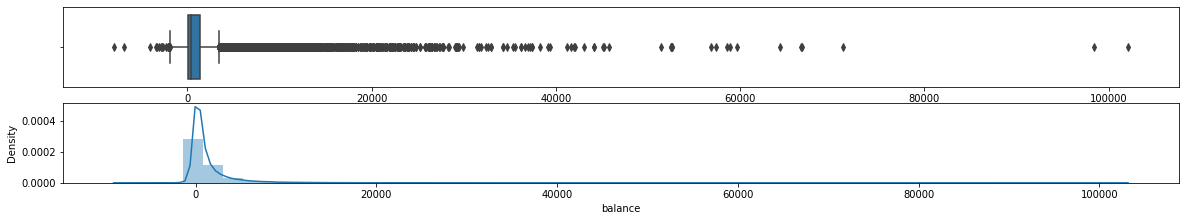

In [70]:
fig = plt.figure(figsize=(20,5))

ax2 = fig.add_subplot(3,1,2) 
sns.boxplot(data = df, x='balance', ax = ax2)

ax3 = fig.add_subplot(3,1,3) 
ax3 = sns.distplot(df['balance'])

There few value lies below 0 which is possible as balance can go negative. There are many values in outlier region so let's remove them.

In [71]:
#removing outliers(upper quartile)
IQR_balance=df['balance'].quantile(0.75)-df['balance'].quantile(0.25)
Upper_limit_b = df['balance'].quantile(0.75)+1.5*IQR_balance
df=df[df['balance']<Upper_limit_b]


In [72]:
Upper_limit_b

3407.5

In [73]:
df['balance'].max()

3407

In [74]:
#removing outliers(lower quartile)
IQR_balance=df['balance'].quantile(0.75)-df['balance'].quantile(0.25)
lower_limit_b = df['balance'].quantile(0.25)-1.5*IQR_balance
df=df[df['balance']>lower_limit_b]

In [75]:
df['balance'].min()

-1329

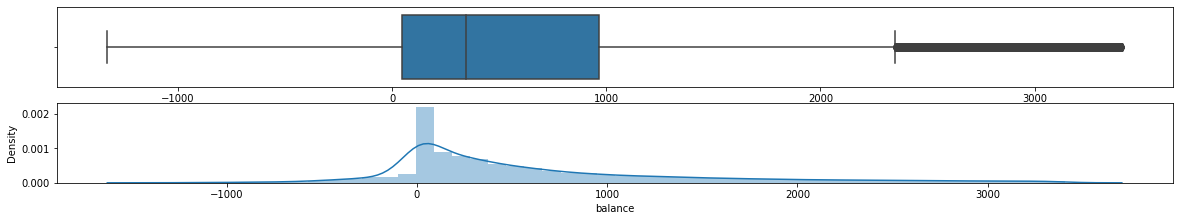

In [76]:
fig = plt.figure(figsize=(20,5))


ax2 = fig.add_subplot(3,1,2) 
sns.boxplot(data = df, x='balance', ax = ax2)

ax3 = fig.add_subplot(3,1,3) 
ax3 = sns.distplot(df['balance'])

## Day

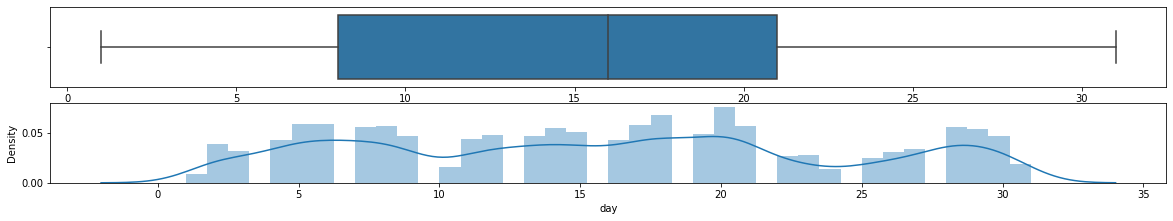

In [77]:
fig = plt.figure(figsize=(20,5))



ax2 = fig.add_subplot(3,1,2) 
sns.boxplot(data = df, x='day', ax = ax2)

ax3 = fig.add_subplot(3,1,3) 
ax3 = sns.distplot(df['day'])

There is no outlier in day variable.

## Duration

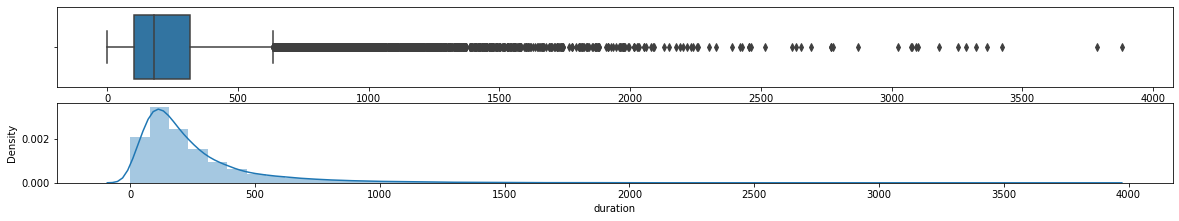

In [78]:
fig = plt.figure(figsize=(20,5))


ax2 = fig.add_subplot(3,1,2) 
sns.boxplot(data = df, x='duration', ax = ax2)

ax3 = fig.add_subplot(3,1,3) 
ax3 = sns.distplot(df['duration'])

We see alot of outliers in duration variable so let's remove them.

In [79]:
#removing outliers(upper quartile)
IQR_balance=df['duration'].quantile(0.75)-df['duration'].quantile(0.25)
Upper_limit = df['duration'].quantile(0.75)+1.5*IQR_balance
df=df[df['duration']<Upper_limit]

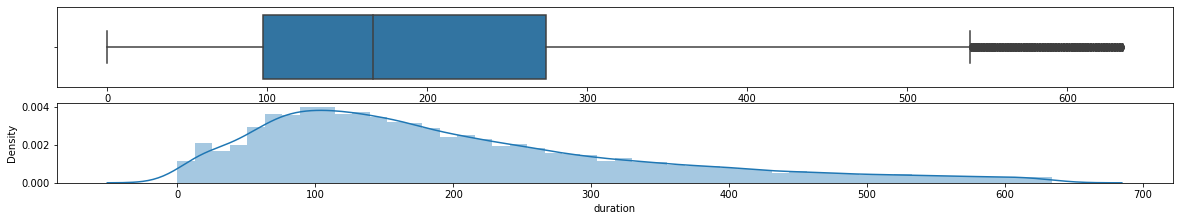

In [80]:
fig = plt.figure(figsize=(20,5))


ax2 = fig.add_subplot(3,1,2) 
sns.boxplot(data = df, x='duration', ax = ax2)

ax3 = fig.add_subplot(3,1,3) 
ax3 = sns.distplot(df['duration'])

## campaign

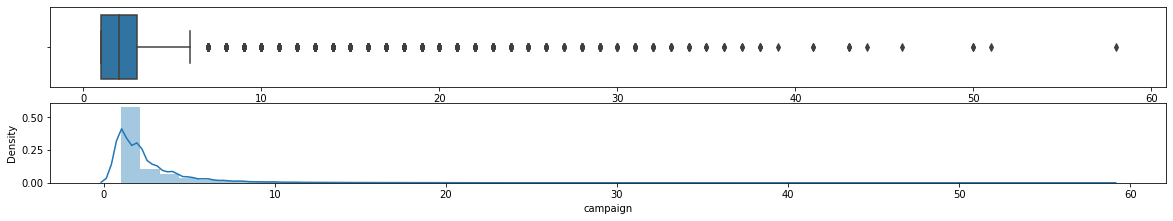

In [81]:
fig = plt.figure(figsize=(20,5))

ax2 = fig.add_subplot(3,1,2) 
sns.boxplot(data = df, x='campaign', ax = ax2)

ax3 = fig.add_subplot(3,1,3) 
ax3 = sns.distplot(df['campaign'])

In [82]:
#removing outliers(upper quartile)
IQR_balance=df['campaign'].quantile(0.75)-df['campaign'].quantile(0.25)
Upper_limit = df['campaign'].quantile(0.75)+1.5*IQR_balance
df=df[df['campaign']<Upper_limit]

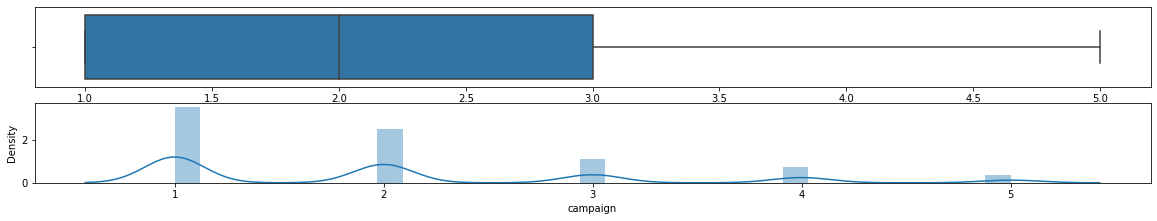

In [83]:
fig = plt.figure(figsize=(20,5))

ax2 = fig.add_subplot(3,1,2) 
sns.boxplot(data = df, x='campaign', ax = ax2)

ax3 = fig.add_subplot(3,1,3) 
ax3 = sns.distplot(df['campaign'])

## pdays

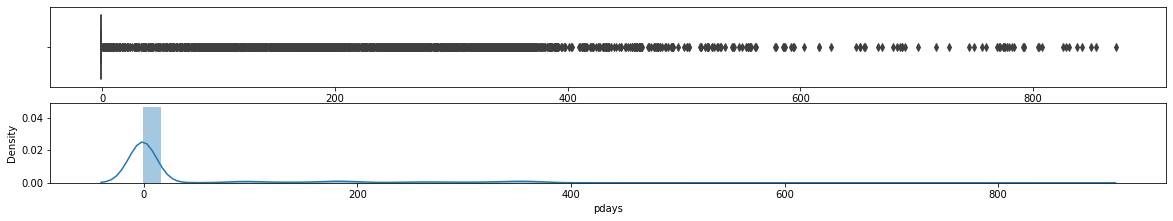

In [84]:
fig = plt.figure(figsize=(20,5))

ax2 = fig.add_subplot(3,1,2) 
sns.boxplot(data = df, x='pdays', ax = ax2)

ax3 = fig.add_subplot(3,1,3) 
ax3 = sns.distplot(df['pdays'])

Removing outlier by IQR method will remove almost all the data points so let's remove the extreme values.

In [85]:
df=df[df['pdays']<400]

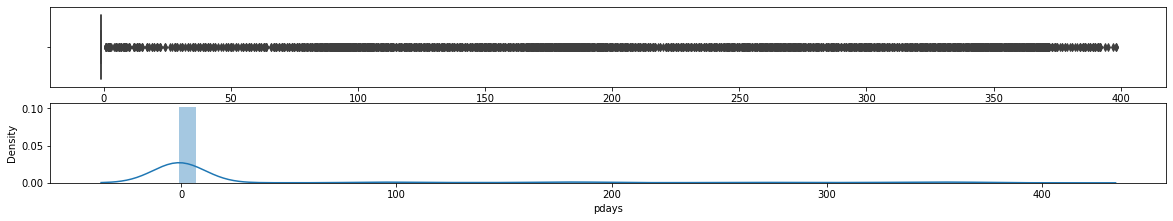

In [86]:
fig = plt.figure(figsize=(20,5))

ax2 = fig.add_subplot(3,1,2) 
sns.boxplot(data = df, x='pdays', ax = ax2)

ax3 = fig.add_subplot(3,1,3) 
ax3 = sns.distplot(df['pdays'])

## previous

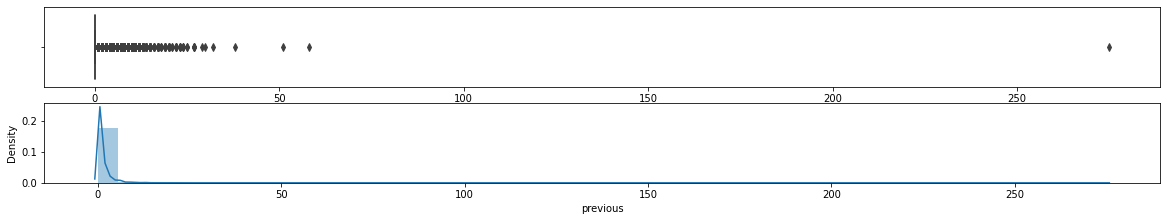

In [87]:
fig = plt.figure(figsize=(20,5))

ax2 = fig.add_subplot(3,1,2) 
sns.boxplot(data = df, x='previous', ax = ax2)

ax3 = fig.add_subplot(3,1,3) 
ax3 = sns.distplot(df['previous'])

Removing outlier by IQR method will remove almost all the data points so let's remove the extreme values.

In [88]:
df=df[df['previous']<70]

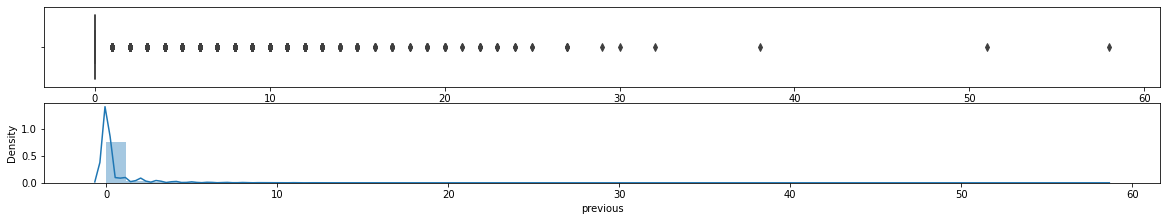

In [89]:
fig = plt.figure(figsize=(20,5))

ax2 = fig.add_subplot(3,1,2) 
sns.boxplot(data = df, x='previous', ax = ax2)

ax3 = fig.add_subplot(3,1,3) 
ax3 = sns.distplot(df['previous'])

In [90]:
m = df.describe(include=['object','category']).columns
m

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

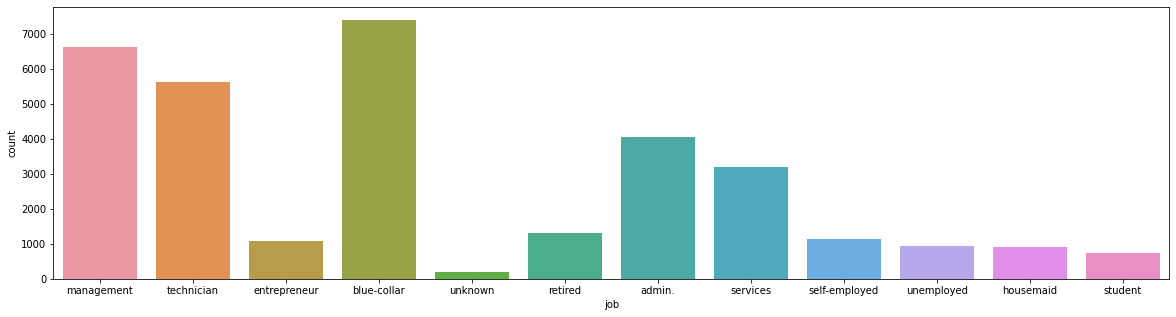

In [91]:
plt.figure(figsize=(20,5))
sns.countplot(x="job", data=df)

We see that most of the people in our dataset are having Blue-collar job .

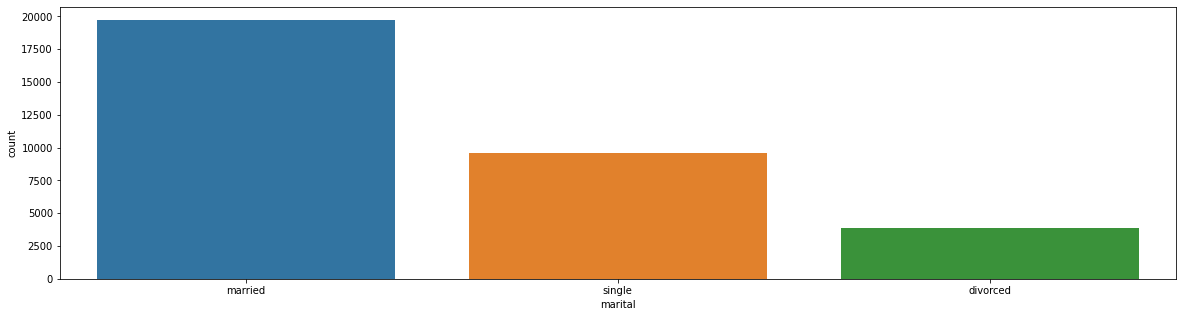

In [92]:
plt.figure(figsize=(20,5))
sns.countplot(x="marital", data=df)

Most of the customers are married.

In [93]:
m

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

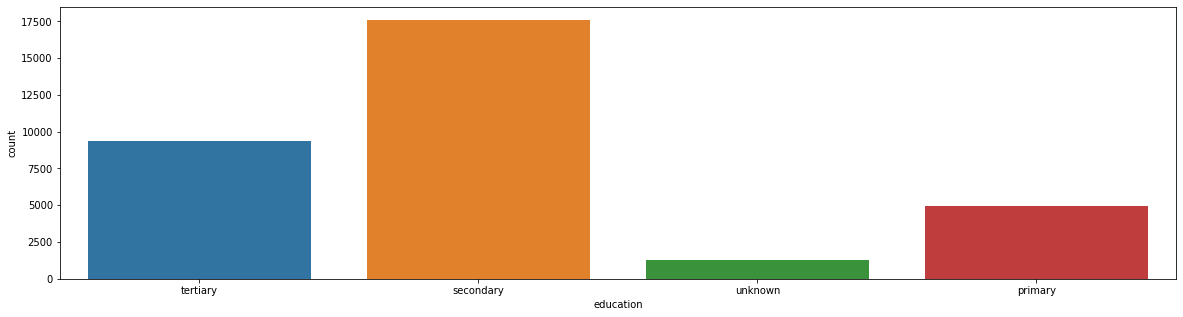

In [94]:
plt.figure(figsize=(20,5))
sns.countplot(x="education", data=df)

Mostly peole are having secondary level of education.

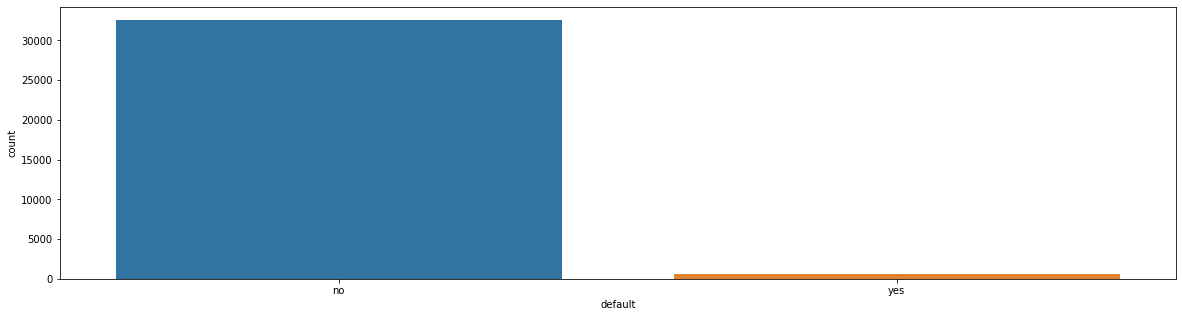

In [95]:
plt.figure(figsize=(20,5))
sns.countplot(x="default", data=df)

Most of the people here are non defaulters.

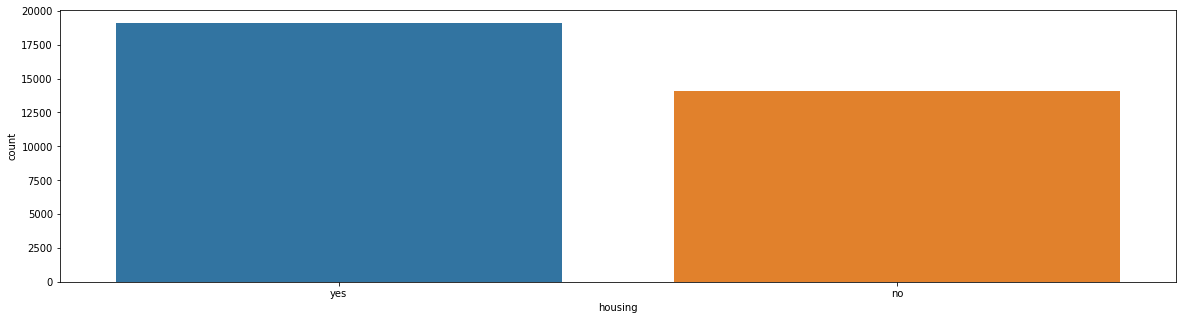

In [96]:
plt.figure(figsize=(20,5))
sns.countplot(x="housing", data=df)

More number of peole are having housing loans.


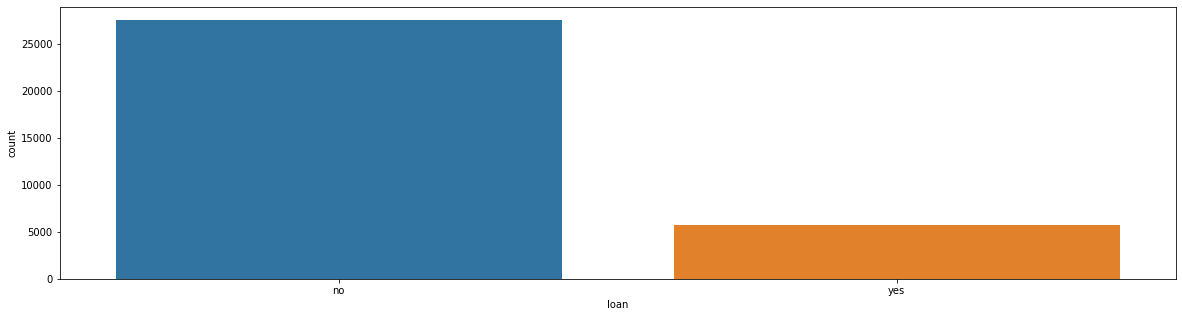

In [97]:
plt.figure(figsize=(20,5))
sns.countplot(x="loan", data=df)

Majority of people are not having personal loans.

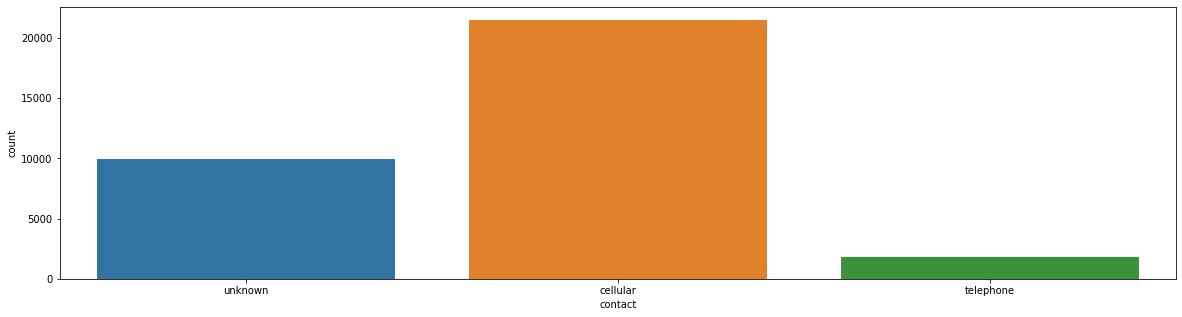

In [98]:
plt.figure(figsize=(20,5))
sns.countplot(x="contact", data=df)

People are using cellular contact, few are using telephones too they might be either too old and not comfortable with cell phones or may be they have some office space which uses telephones.

In [99]:
m

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

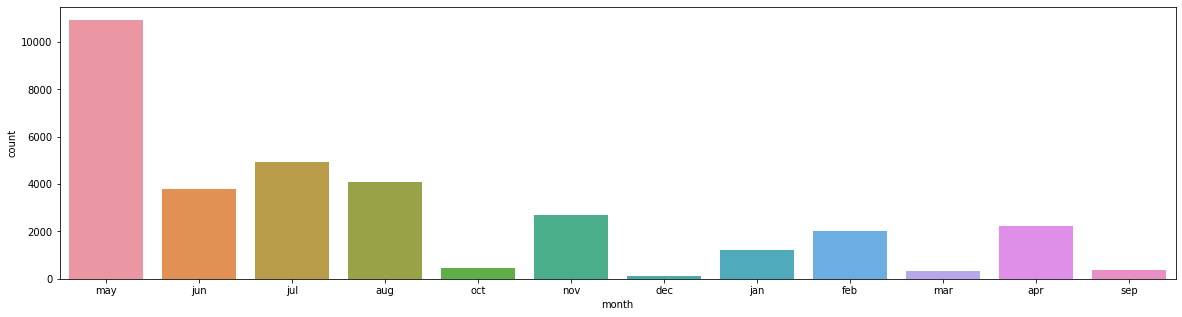

In [100]:
plt.figure(figsize=(20,5))
sns.countplot(x="month", data=df)

May is the month when most of the people were last contacted.

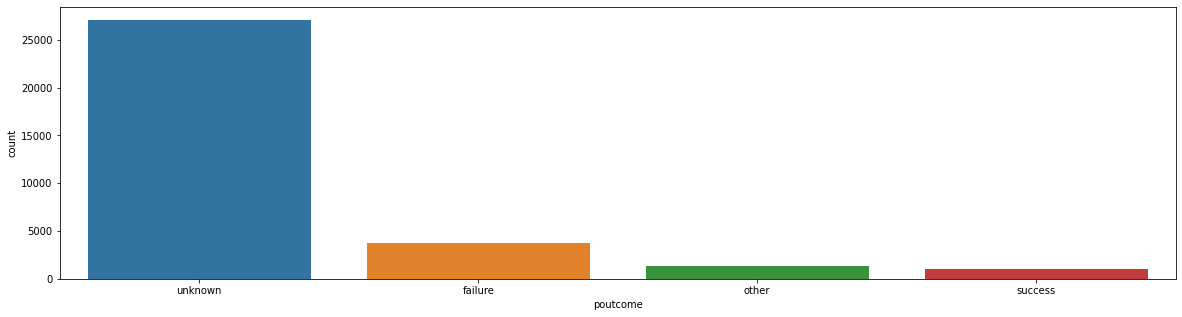

In [101]:
plt.figure(figsize=(20,5))
sns.countplot(x="poutcome", data=df)

Previous marketing campaign was a failure.Although we see here is large part of data which is unknown so cannot say anything very clearly.

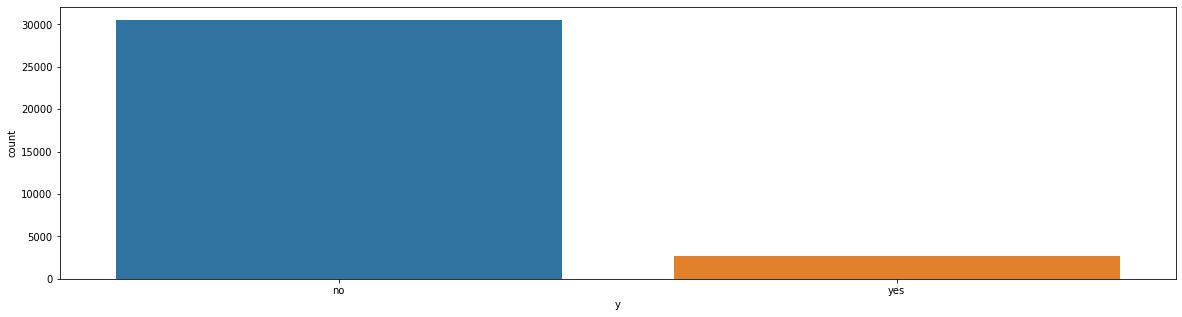

In [102]:
plt.figure(figsize=(20,5))
sns.countplot(x="y", data=df)

Very few number of people opted for term deposit so we can now safely say that previous marketing campaign was a failure.

Catagorical vs Target Variables

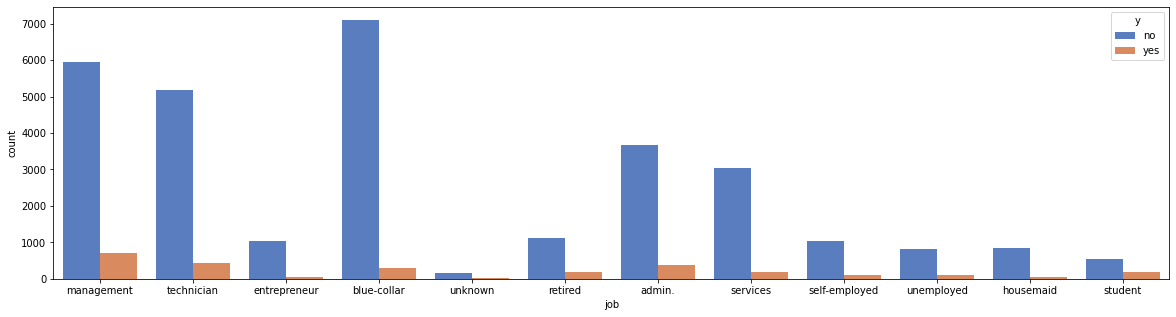

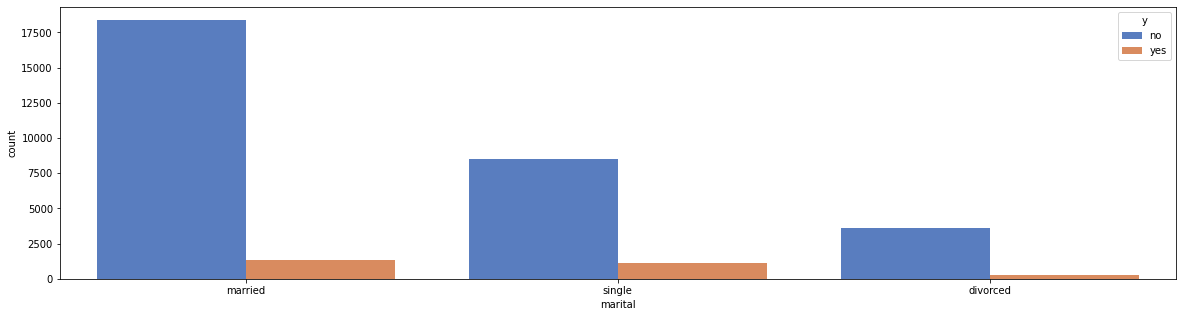

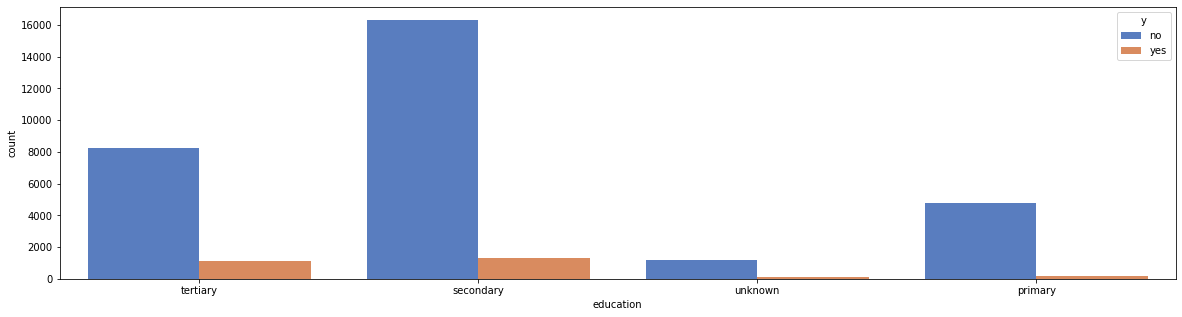

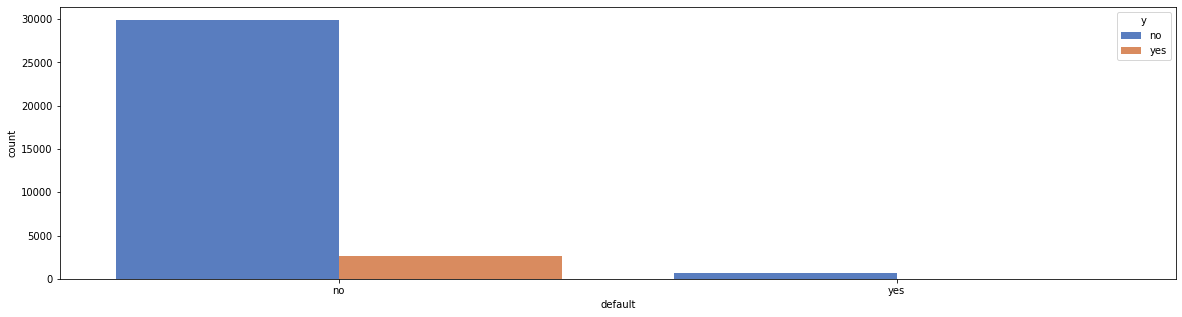

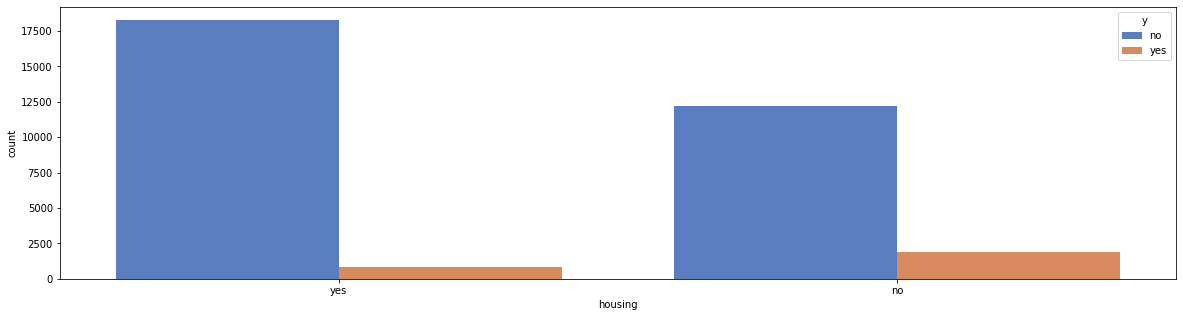

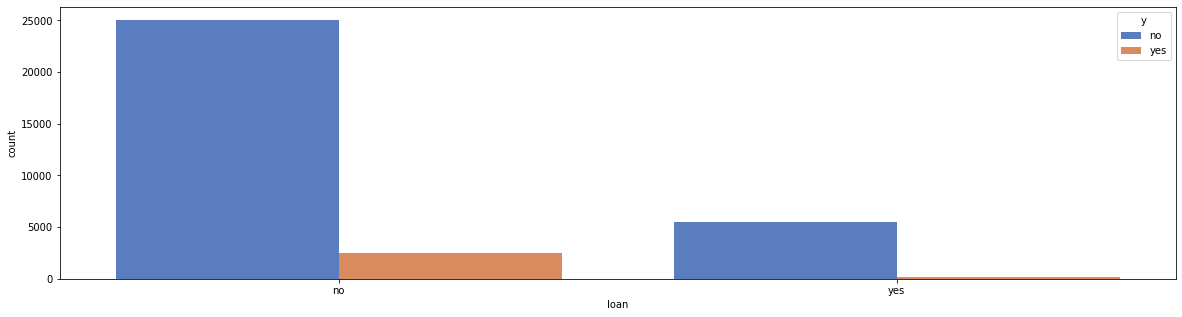

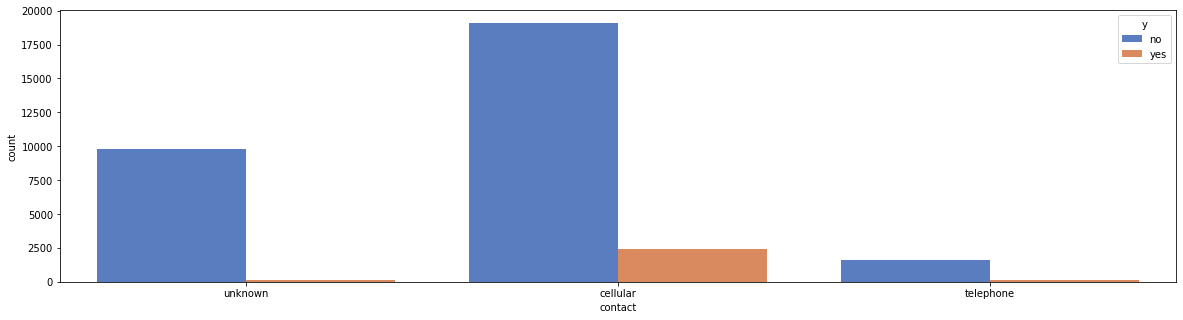

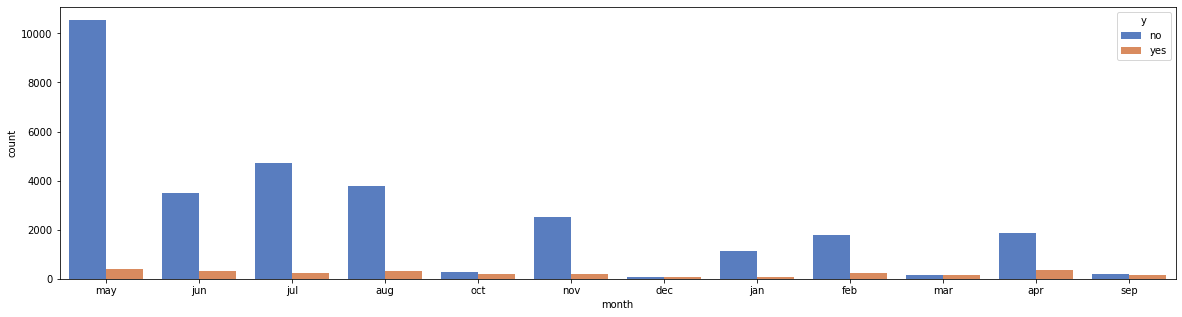

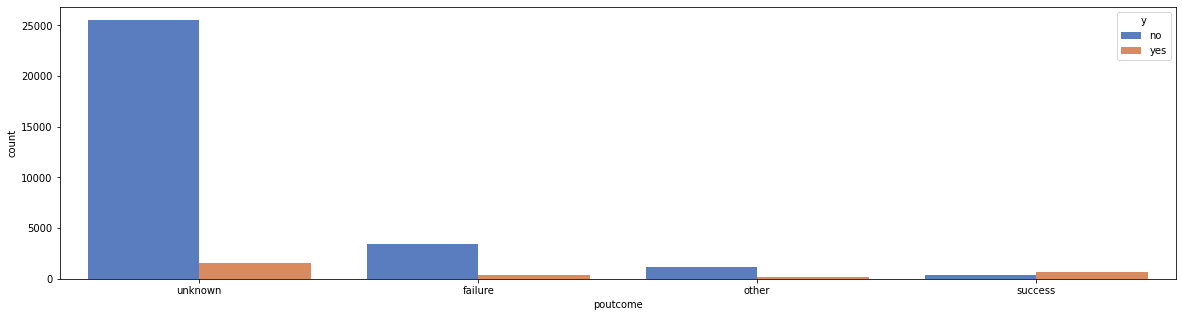

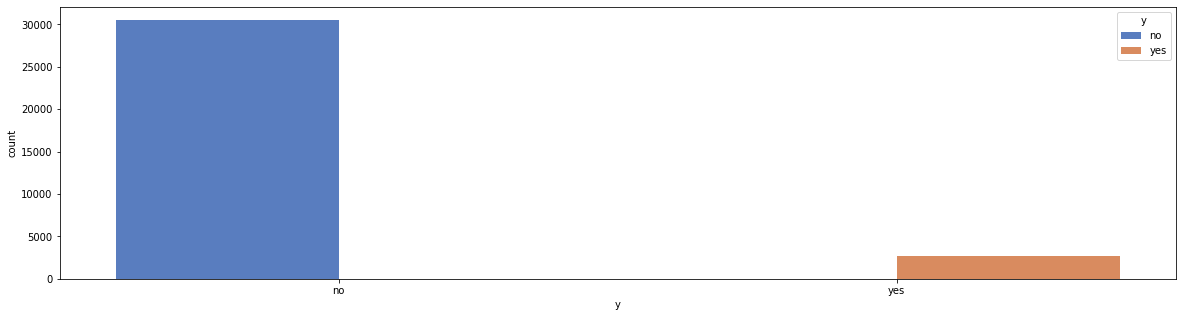

In [103]:
a = df.describe(include=['object','category']).columns
#b=  df.describe(include=['object','category']).columns
for i in a:
  plt.figure(figsize=(20,5))
  sns.countplot(df[i],hue=df["y"], palette="muted")
  #pd.crosstab(df[i],df[j]).plot.bar(stacked=True)
  #plt.legend(title='mark')
  plt.show()

<b>1. Job vs term deposit(y):</b>

Most of the people do not opted for term deposit but if we focus on the people who did. Most of them belong to Management,Techitian,Blue-color and Admin work profiles.
So we should target people of these profession more.


<b>2. Marital Status vs term deposit(y):</b>

Married and single peole opted for term deposit but very less number of divorced people did.


<b>3. Education vs term deposit(y):</b>

People with tertiary and secondary education are opting for term deposit more as compare to people with primary education.The reason of this could be the lack of information of the people with primary education so we should focus on people with tertiary and secondary education but at the same time we should also try to create awareness among people with primary education about term deposits.

<b>4. Default vs term deposit(y):</b>

Non of the peole with loan defaults opted for term deposit.The reason of this could be as they are already having a debt to pay they are avoiding the deposit.



<b>5. Housing vs term deposit(y):</b>

People with no housing loan are opting for term deposit more than the people with housing loan. But both are significant in number.


<b>6. Loan vs term deposit(y):</b>

People with no loan are opting for term deposit and very negligble number of people are opting for term deposit who are having a loan.





















Numerical vs Target Variables





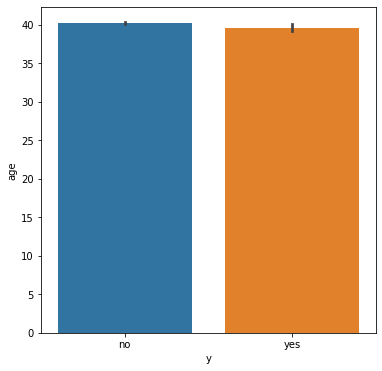

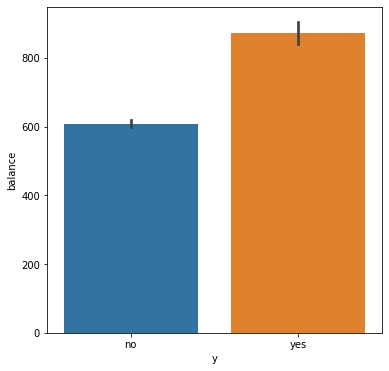

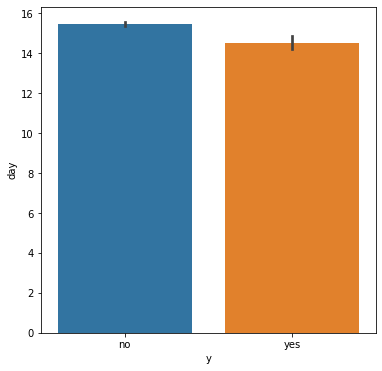

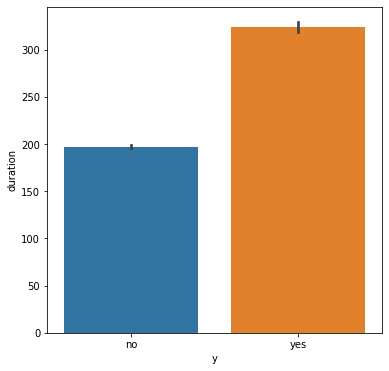

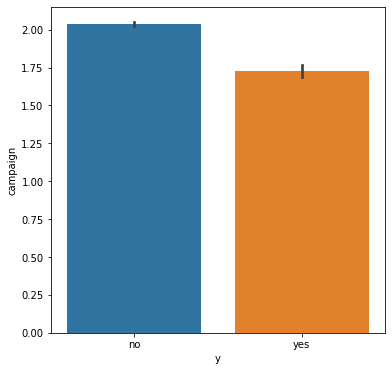

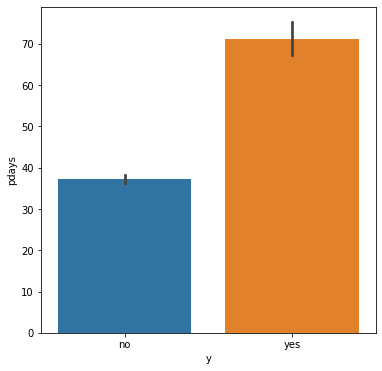

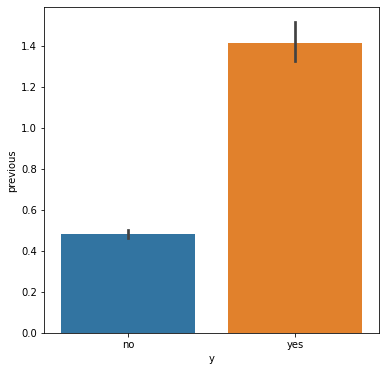

In [104]:
c = df.describe(include=['object','category']).columns
d=  df.describe().columns
for l in d:
  plt.figure(figsize=(6,6))
  sns.barplot(data=df, x=df["y"], y=l)

<b>Balance vs Term deposit(y):</b>

People with high balance (more than 600 as per our graph) are opting for term deposit more tha the people with low balance.

<b>Duration vs Term deposit(y):</b>

If duration of the call is high people usually subscribe for the term deposits.

<b>Campaign vs Term deposit(y):</b>

People who opted to enroll for term deposits required less number of contact during the entire campaign then compare to the people who didn't.


<b>Pdays vs Term deposit(y):</b>

Graph shows that the client might agree to opt for term deposits if made contact after some number of days.

<b>Previous vs Term deposit(y):</b>

If number of contact during the whole campaign is more people are opting for term deposit in comparison to less number of contacts.









In [105]:
#Making copy of the data to keep the orignal dataset safe.
dataset=df.copy()

In [106]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [107]:
### Data encoding
#label encoding
encoders_nums = {"marital":{"married":1,"single":0,"divorced":2},
                 "education":{"secondary":1,"tertiary":0,"primary":2,"unknown":3},
                 "default":     {"no": 0, "yes": 1},
                 "housing":     {"no": 0, "yes": 1},
                 "loan":        {"no": 0, "yes": 1},
                 "contact":     {"cellular":0,"unknown":1,"telephone":2},
                 "poutcome":    {"unknown":0,"failure":1,"other":2,"success":3},
                  "y":        {"no": 0, "yes": 1} 
                 }

dataset = dataset.replace(encoders_nums)

In [108]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,1,0,0,2143,1,0,1,5,may,261,1,-1,0,0,0
1,44,technician,0,1,0,29,1,0,1,5,may,151,1,-1,0,0,0
2,33,entrepreneur,1,1,0,2,1,1,1,5,may,76,1,-1,0,0,0
3,47,blue-collar,1,3,0,1506,1,0,1,5,may,92,1,-1,0,0,0
4,33,unknown,0,3,0,1,0,0,1,5,may,198,1,-1,0,0,0


In [109]:
dataset = pd.get_dummies(dataset, columns=["job", "month"], prefix=["work", "mon"])

In [110]:
dataset.head()

,age,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y,work_admin.,work_blue-collar,work_entrepreneur,work_housemaid,work_management,work_retired,work_self-employed,work_services,work_student,work_technician,work_unemployed,work_unknown,mon_apr,mon_aug,mon_dec,mon_feb,mon_jan,mon_jul,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep
0,58,1,0,0,2143,1,0,1,5,261,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,44,0,1,0,29,1,0,1,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,33,1,1,0,2,1,1,1,5,76,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,47,1,3,0,1506,1,0,1,5,92,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,33,0,3,0,1,0,0,1,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [111]:
#Checking the target variables
dataset.y.value_counts()

0    30515
1     2703
Name: y, dtype: int64

In [112]:
#Seperating the target variable 
X=dataset.iloc[:,0:-1]
y= dataset['y']



In [113]:
from imblearn.combine import SMOTETomek
from collections import Counter
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_sample(X, y)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({0: 29928, 1: 29928})


In [114]:
#Spliting the dataset into test and train with test size having 20 percent of the dataset.
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(47884, 38)
(11972, 38)


## <b> Baseline models

## <b>Logistic Regression

In [115]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## <b>Evaluating the performance of the trained model

In [116]:
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [117]:
test_preds

array([[9.99552262e-01, 4.47737914e-04],
       [4.07238039e-05, 9.99959276e-01],
       [2.87856955e-04, 9.99712143e-01],
       ...,
       [5.58901072e-04, 9.99441099e-01],
       [9.99635353e-01, 3.64647304e-04],
       [2.50029834e-03, 9.97499702e-01]])

In [118]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [119]:
train_class_preds

array([0, 1, 1, ..., 1, 1, 0])

In [120]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [121]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  1.0
The accuracy on test data is  1.0


In [122]:
import sklearn.metrics as metrics


In [123]:
fpr, tpr, threshold = metrics.roc_curve(y_test, test_class_preds)
roc_auc = metrics.auc(fpr, tpr)

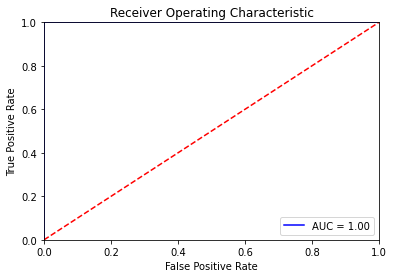

In [124]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## <b>  Decision Tree Classifier


In [125]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## <b> Predict on Test Set

In [126]:
y_predicted = classifier.predict(X_test)

###<b> Measure Accuracy of the Classifier

In [127]:
accuracy_score(y_test, y_predicted) * 100

100.0

In [128]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_predicted)
roc_auc = metrics.auc(fpr, tpr)


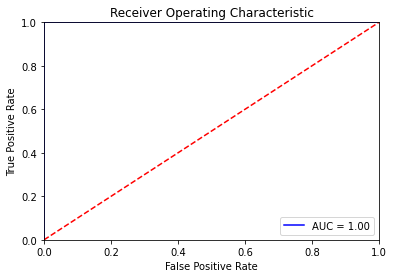

In [129]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## <b> Random forest

In [130]:
from sklearn.ensemble import RandomForestClassifier


In [131]:
# Hyperparameter tuning

classifier = RandomForestClassifier() # For GBM, use GradientBoostingClassifier()

# Fit the object to train dataset
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [132]:
train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

In [133]:
# Obtain accuracy on train set
accuracy_score(y_train,train_preds)

1.0

In [134]:
# Obtain accuracy on test set
accuracy_score(y_test,test_preds)

1.0

In [135]:
# Calculate roc_auc score on train set
roc_auc_score(y_train,train_preds)

1.0

In [136]:
# Calculate roc_auc score on test set
roc_auc_score(y_test,test_preds)

1.0

##<b> k nearest

In [137]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

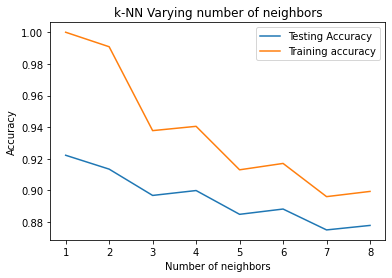

In [138]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [139]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=4)

In [140]:
# Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [141]:
knn.score(X_test,y_test)

0.899933177413966

In [142]:
y_pred = knn.predict(X_test)

In [143]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [144]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix,roc_curve

In [151]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

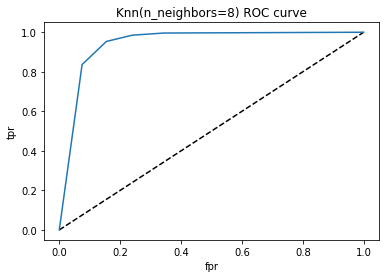

In [152]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=8) ROC curve')
plt.show()

In [153]:
# Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.8993813719394977

So out of all the baseline models we tested except KNN every other shows 100 percent accuracy and roc_auc value of 1 which is a sign of overfitting. So moving ahead with KNN. We will be using Roc_auc as the evaluation matrics for this model.

In [154]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [155]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [157]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [159]:
knn_cv.score(X_test,y_test)

0.9222352155028399

In [160]:
y_pred = knn_cv.predict(X_test)

In [162]:
y_pred_proba = knn_cv.predict_proba(X_test)[:,1]

In [163]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [164]:
# Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.9216235829183352